# Lowry

In [30]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Data for callibration curve:

In [5]:
df = pd.read_csv ('raw_data.csv', sep="\t", decimal=",", header=None, names=["conc", "absorption"])
print(df)

       conc  absorption
0   0.00000       0.063
1   0.00000       0.050
2   0.02500       0.172
3   0.02500       0.165
4   0.03125       0.204
5   0.03125       0.191
6   0.04167       0.235
7   0.04167       0.249
8   0.06250       0.329
9   0.06250       0.330
10  0.12500       0.539
11  0.12500       0.536
12  0.25000       0.812
13  0.25000       0.821


## Data of unknowns


In [6]:
y1 = 0.208
y2 = 0.196
y_mean = np.mean([y1, y2])
y_mean

0.202

# Plot the callibration curve and second degree polynomial regression analysis:


Text(0.5, 1.0, 'Lowry')

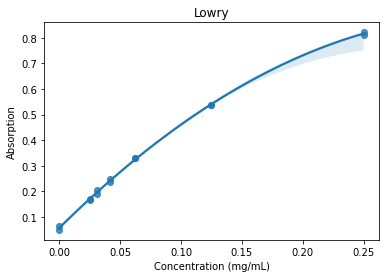

In [16]:
#sns.regplot(x=df.iloc[:,0], y=df.iloc[:, 1], scatter=True, order=2, data=df)
sns.regplot(x=df.iloc[:,0], y=df.iloc[:, 1], scatter=True, order=2, data=df)
plt.xlabel('Concentration (mg/mL)')
plt.ylabel('Absorption')
plt.title('Lowry')

In [36]:
def objective(x, a, b, c):
    return a * x + b * x**2 + c

x = df.iloc[:,0]
y = df.iloc[:,1]
popt, _ = curve_fit(objective, x, y)
b, a, c = popt
print(a)
print(b)
print(c)

-6.65670011633704
4.699671907412292
0.057139834318500615


In [37]:
c_adjusted = c - y_mean
c_adjusted

-0.1448601656814994

In [38]:
def abc(a, b, c):
    discriminant = (b**2) - (4*a*c)
    if discriminant < 0:
        return None
    elif discriminant > 0:
        x1 = (-b + math.sqrt(discriminant)) / (2*a)
        x2 = (-b - math.sqrt(discriminant)) / (2*a)
        return x1, x2
    else:
        x = (-b) / (2*a)
        return x

In [40]:
answer = abc(a, b, c_adjusted)[0] # first intersection is correct.
print("The concentration protein is:", round(answer, 3), "mg/mL")

The concentration protein is: 0.032 mg/mL
